In [1]:
### INSTALL THE SEABORN LIBRARY
pip install seaborn

SyntaxError: invalid syntax (1809434348.py, line 2)

In [2]:
### IMPORT THE LIBRARIES
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [144]:
### LOAD DATA CONFIGURATION
### File Path
FILE_PATH = "/Users/GavinAJohnson/Python Projects/UCD Cert in Data Analytics/Data/"

### FILENAME
# LEI Data - with dates split into year and month colums
lei_extract_file_path = FILE_PATH + "lei_extract_dates_20230515.csv"

# Country Region Data
country_region_csv = FILE_PATH + "country_region_data.csv"

# Registration Authority Data
registration_authority_csv = FILE_PATH + "2022-03-23_ra_list_v1_7.csv"

# ELF Code List
elf_code_list_csv = FILE_PATH + "2021-10-21-elf-code-list-v1_4_1.csv"

In [315]:
### LOAD DATA INTO THE DATAFRAMES
### 1. LEI Data
df_lei_data = pd.DataFrame(pd.read_csv(lei_extract_file_path,","))
### 2. Country Region Data
df_country_region = pd.DataFrame(pd.read_csv(country_region_csv,","))
### 3. Registration Authority Data
df_registration_authority = pd.DataFrame(pd.read_csv(registration_authority_csv, ","))
### 4. ELF Code List Data
df_elf_code_list = pd.DataFrame(pd.read_csv(elf_code_list_csv, ","))
df_elf_code_list = df_elf_code_list[df_elf_code_list['Language'].isin(['English'])]

### Tests
# Print the Info of the DataFrame
#print(df_lei_data.info())
#print(df_country_region.info())
print(df_registration_authority.info())

# Print Heads
#print(df_lei_data.head())
#print(df_country_region.head())
#print(df_registration_authority.head(50))

### MERGE THE DATA FRAMES LEI DATA AND COUNTRY REGION DATA
#print(df_lei_data.head())
#print(df_country_region.head())
#Merge the LEI data dataframe with the country region dataframe
df_lei_country_region =  df_lei_data.merge(df_country_region, how='left', left_on='country', right_on='alpha_2')

#Merge the LEI data / country dataframe with the registration authority dataframe
df_lei_country_region_reg_auth = df_lei_country_region.merge(df_registration_authority, how='left', left_on='ra_code', right_on='Registration_Authority_Code')

#Merge the LEI data / country / registration authority dataframe dataframe with the elf code list dataframe
df_lei_country_region_reg_auth_elf_code = df_lei_country_region_reg_auth.merge(df_elf_code_list, how='left', left_on='elf_code', right_on='ELF_Code')

### Tests
#print(df_lei_country_region.info())
#print(df_lei_country_region.head())
#print(df_lei_country_region_reg_auth.info())
#print(df_lei_country_region_reg_auth.head())
#print(df_lei_country_region_reg_auth_elf_code.info())
#print(df_lei_country_region_reg_auth_elf_code.head())

C:\Users\GavinAJohnson\AppData\Local\Temp\ipykernel_21284\4006140978.py:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df_lei_data = pd.DataFrame(pd.read_csv(lei_extract_file_path,","))
C:\Users\GavinAJohnson\AppData\Local\Temp\ipykernel_21284\4006140978.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df_country_region = pd.DataFrame(pd.read_csv(country_region_csv,","))
C:\Users\GavinAJohnson\AppData\Local\Temp\ipykernel_21284\4006140978.py:7: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df_registration_authority = pd.DataFrame(pd.read_csv(registration_authority_csv, ","))
C:\Users\GavinAJohnson\AppData\Local\Temp\ipykernel_21284\4006140978.py:9: FutureWarning: In a future version of pandas all argumen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 10 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Registration_Authority_Code                                      1037 non-null   object
 1   Country                                                          1034 non-null   object
 2   Country_Code                                                     1031 non-null   object
 3   Jurisdiction_(country_or_region)                                 1034 non-null   object
 4   International_name_of_Register                                   625 non-null    object
 5   Local_name_of_Register                                           547 non-null    object
 6   International_name_of_organisation_responsible_for_the_Register  962 non-null    object
 7   Local_name_of_organisation_responsible_for_the_Regi

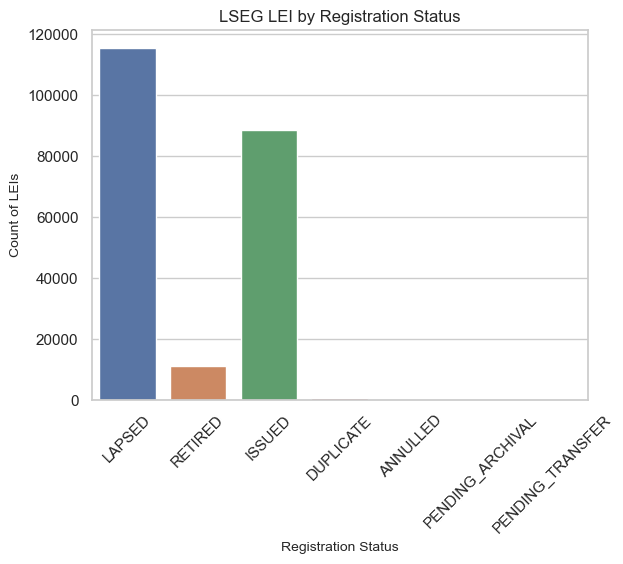

In [317]:
### Chart - LSEG LEI Data broken by Registration Status
#Set the Theme of the Chart
sns.set_theme(style='whitegrid')

# Create the Chart
chart = sns.countplot(x="reg_status", data=df_lei_country_region)

# Set Title and Attributes for x y labels
chart.set_title("LSEG LEI by Registration Status")
chart.set_xlabel('Registration Status', fontdict={'size': 10})
chart.set_ylabel('Count of LEIs', fontdict={'size': 10})

# Rotate the x labels 45 degrees to make them legible
plt.xticks(rotation=45)

# Display the Chart
plt.show()

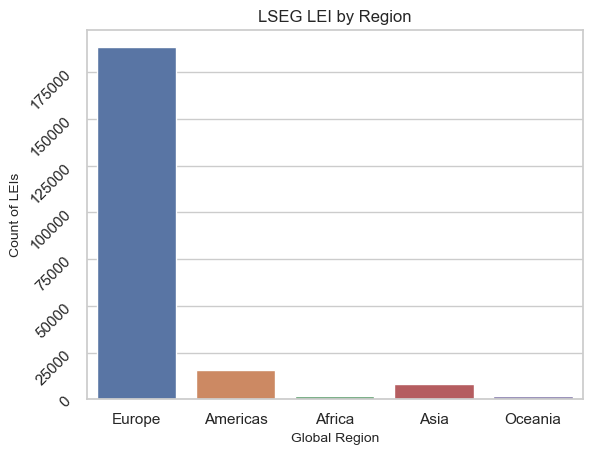

In [318]:
### Chart - LSEG LEI Data broken by Geographic Region
#Set the Theme of the Chart
sns.set_theme(style='whitegrid')

# Create the Chart
chart = sns.countplot(x="region", data=df_lei_country_region)

# Set Title and Attributes for x y labels
chart.set_title("LSEG LEI by Region")
chart.set_xlabel('Global Region', fontdict={'size': 10})
chart.set_ylabel('Count of LEIs', fontdict={'size': 10})

# Rotate the x labels 45 degrees to make them legible
plt.yticks(rotation=45)

# Display the Chart
plt.show()

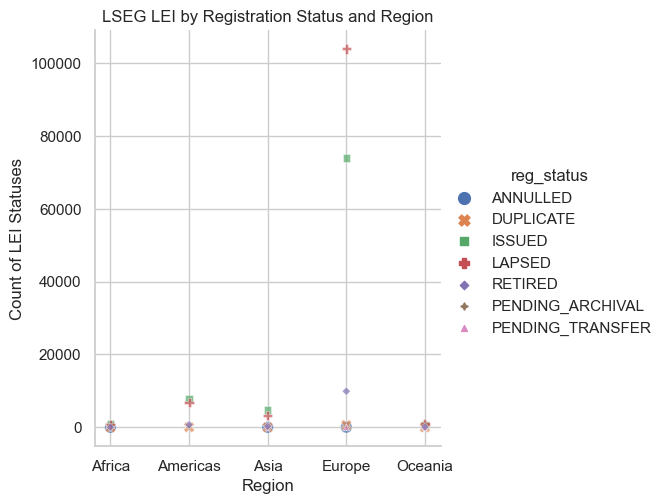

In [324]:
### Chart - LSEG LEI Data broken by Status and Geographic Region
#Set the Theme of the Chart
sns.set_theme(style='whitegrid')

# Create the Chart
df_chartdata = df_lei_country_region.groupby(['region','reg_status'], as_index=False)['lei'].count()
#Test
#print(df_chartdata)

# Create the Chart
# alpha used to allow overlapping plots to be viewed
chart = sns.relplot(x="region", y="lei", kind="scatter", data=df_chartdata, hue="reg_status", style="reg_status", size="reg_status", alpha=0.7)

# Set the Title and Axis Labels
chart.set(title="LSEG LEI by Registration Status and Region")
chart.set_axis_labels('Region', 'Count of LEI Statuses')

# Display the Plot
plt.show()

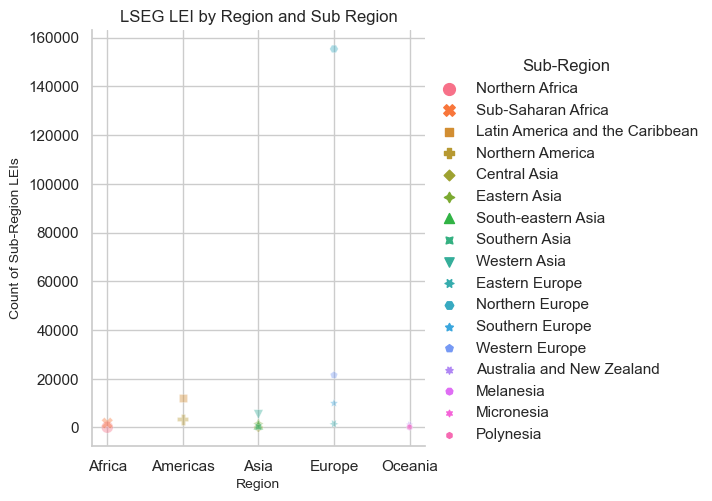

In [338]:
### CHARTS
# Use the .groupby function to create sub-totals for the sub-regions
df_chartdata = df_lei_country_region.groupby(['region','sub_region'], as_index=False)['lei'].count()
# Tests
#print(df_chartdata.info())
#print(df_chartdata.head())
#print(type(df_chartdata))

#Set the Theme of the Chart
sns.set_theme(style='whitegrid')

# Create the Chart
chart = sns.relplot(x="region", y="lei", kind="scatter", data=df_chartdata, hue="sub_region", style="sub_region", size="sub_region", alpha=0.4)

# Set the Title and Axis Labels
chart.set(title="LSEG LEI by Region and Sub Region")
chart.set_axis_labels('Region', 'Count of Sub-Region LEIs', fontdict={'size': 10})

# Set the Title of the legend
chart._legend.set_title('Sub-Region')
# Display the Plot
plt.show()

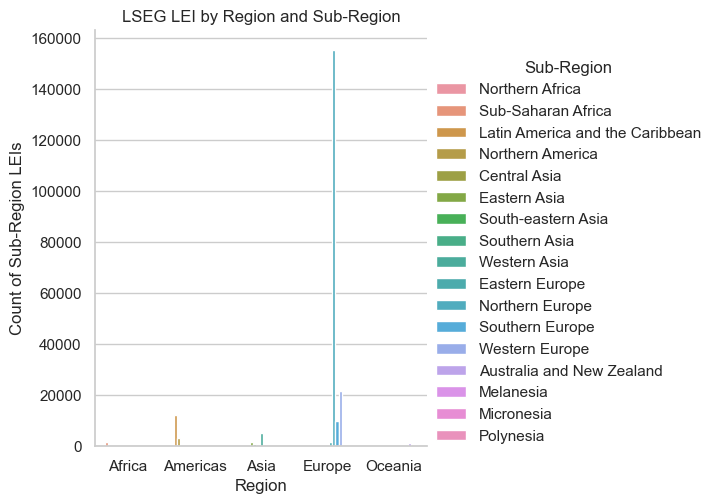

In [333]:
### Chart - LSEG LEI Data broken by Region and Sub-Region

# Use the .groupby function to create sub-totals for the sub-regions
df_chartdata = df_lei_country_region.groupby(['region','sub_region'], as_index=False)['lei'].count()

# Initialise the Chart
#Set the Theme of the Chart
sns.set_theme(style='whitegrid')
# Use "hue" to show the breakdown by sub-region
chart = sns.catplot(x="region", y="lei",  kind="bar", data=df_chartdata, hue="sub_region")
#print(df_chartdata)

# Set the Title and Axis labels for the chart
chart.set(title="LSEG LEI by Region and Sub-Region")
chart.set_axis_labels('Region', 'Count of Sub-Region LEIs')

# Assign a Label for the legend
# https://stackoverflow.com/questions/58488682/seaborn-how-to-set-custom-hue-label-in-catplot-instead-of-automatic-one
chart._legend.set_title('Sub-Region')

# Show the Chart
plt.show()

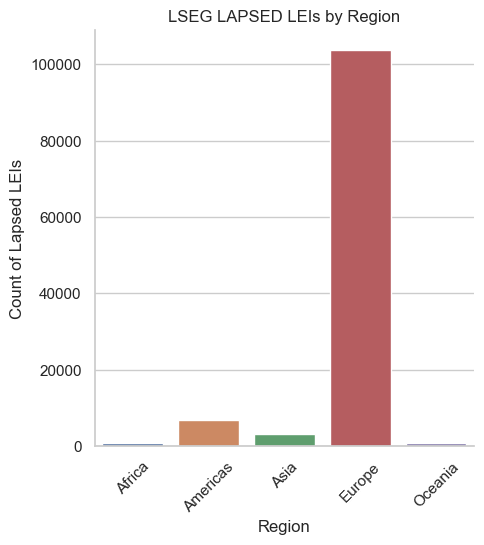

In [334]:
### LSEG LEIs Investigate the LAPSED LEIs
# Use Groupby to creat the subtotals.
df_chartdata_chart = df_lei_country_region.groupby(['reg_status','region'], as_index=False)['lei'].count()
#print(df_chartdata_chart)

# Filter the LAPSED LEIs using the .isin() function.
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['reg_status'].isin(['LAPSED'])]
# Test 
#print(df_chartdata2)

# Initialise the Chart
#Set the Theme of the Chart
sns.set_theme(style='whitegrid')
chart = sns.catplot(x="region", y="lei",  kind="bar", data=df_chartdata_chart)

# Set the Title and Axis labels for the chart
chart.set(title="LSEG LAPSED LEIs by Region")
chart.set_axis_labels('Region', 'Count of Lapsed LEIs')

# Rotate the xticks to make them legible
plt.xticks(rotation=45)

# Display the Chart
plt.show()

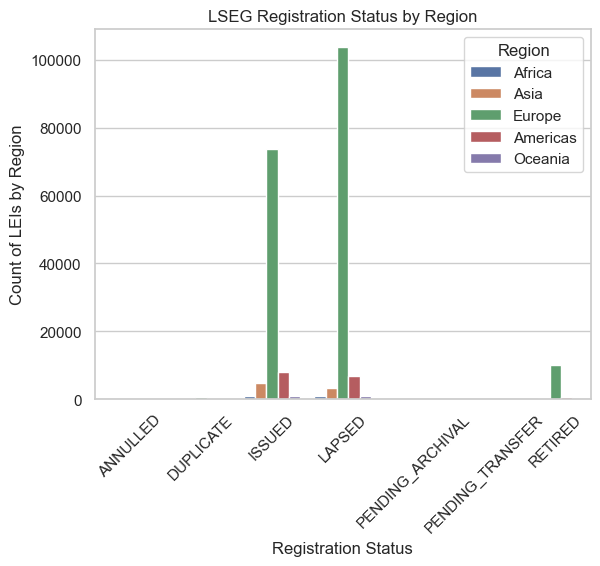

In [335]:
### Bar Chart to view the Registartion Status by Region

# Use Group By to Create the sub-Totals
df_chartdata_chart = df_lei_country_region.groupby(['reg_status','region'], as_index=False)['lei'].count()
#print(df_chartdata_chart)

# Initialise the Chart
#Set the Theme of the Chart
sns.set_theme(style='whitegrid')
# use hue to create the sub-total by Region
chart = sns.barplot(x="reg_status", y="lei", 
            data=df_chartdata_chart, 
            hue="region"
           )

# Set the Title and axis labels for the chart.
chart.set(title="LSEG Registration Status by Region")
chart.set(xlabel='Registration Status', ylabel='Count of LEIs by Region')

# Rotate the x-ticks to make them legible
plt.xticks(rotation=45)

# Assing a custion title to the Legend
plt.legend(title="Region")

# Show plot
plt.show()

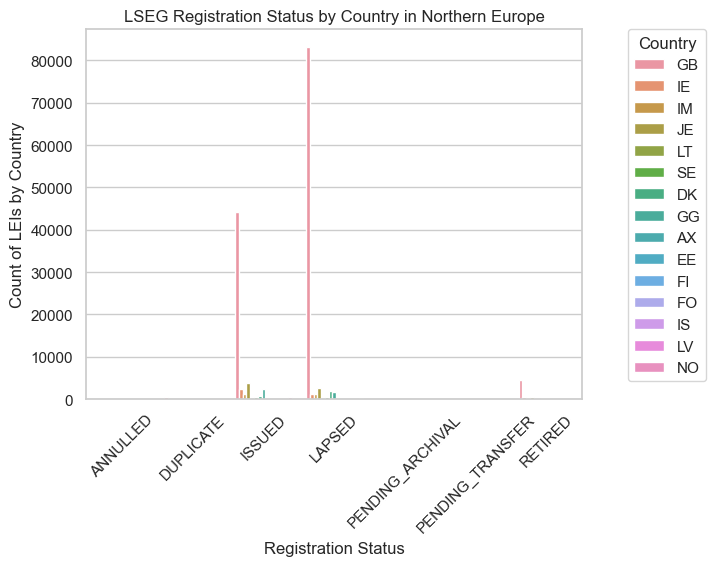

In [339]:
### Bar Chart to view the Registartion Status by Counrty in Nortern Europe

# Use the .groupby Function to create the sub-totals
df_chartdata_chart = df_lei_country_region.groupby(['reg_status','sub_region','country'], as_index=False)['lei'].count()
# Use the .isin function to filter the counties for nothern Europe.
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['sub_region'].isin(['Northern Europe'])]
# Test
#print(df_chartdata_chart)

# Initialise the Chart
#Set the Theme of the Chart
sns.set_theme(style='whitegrid')
# use hue to seperate out by country.
chart = sns.barplot(x="reg_status", y="lei", 
            data=df_chartdata_chart, 
            hue="country"
           )

# Set the title and the axis labels
chart.set(title="LSEG Registration Status by Country in Northern Europe")
chart.set(xlabel='Registration Status', ylabel='Count of LEIs by Country')

# rotate the axis to make them legible.
plt.xticks(rotation=45)

#Move the legend to the right as was overlapping the chart data.
plt.legend(title="Country", loc='upper right', bbox_to_anchor=(1.25, 1), borderaxespad=0)

# Show plot
plt.show()

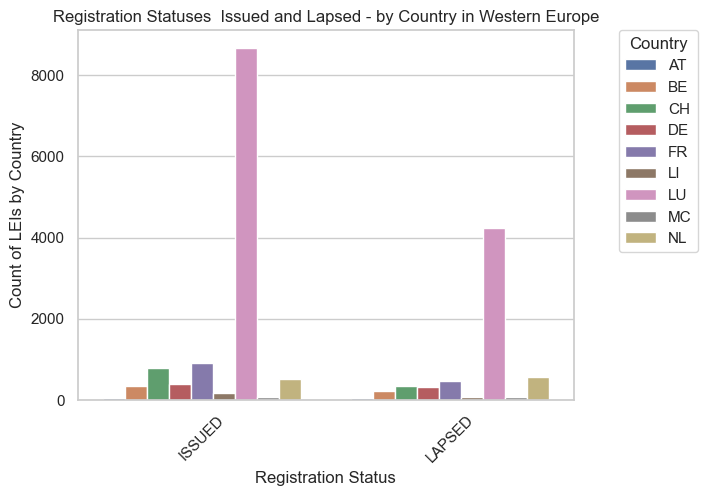

In [340]:
### Bar Chart to view the Registartion Status by Counrty in Western Europe

# Use the .groupby Function to create the sub-totals
df_chartdata_chart = df_lei_country_region.groupby(['reg_status','sub_region','country'], as_index=False)['lei'].count()
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['sub_region'].isin(['Western Europe'])]
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['reg_status'].isin(['ISSUED','LAPSED'])]
# Test
#print(df_chartdata_chart)

# Initialise the Chart
#Set the Theme of the Chart
sns.set_theme(style='whitegrid')
# use hue to seperate out by country.
chart = sns.barplot(x="reg_status", y="lei", 
            data=df_chartdata_chart, 
            hue="country"
           )

# Set the title and the axis labels
chart.set(title="Registration Statuses  Issued and Lapsed - by Country in Western Europe")
chart.set(xlabel='Registration Status', ylabel='Count of LEIs by Country')

# rotate the axis to make them legible.
plt.xticks(rotation=45)

#Move the legend to the right as was overlapping the chart data.
plt.legend(title="Country", loc='upper right', bbox_to_anchor=(1.25, 1), borderaxespad=0)

# Show plot
plt.show()

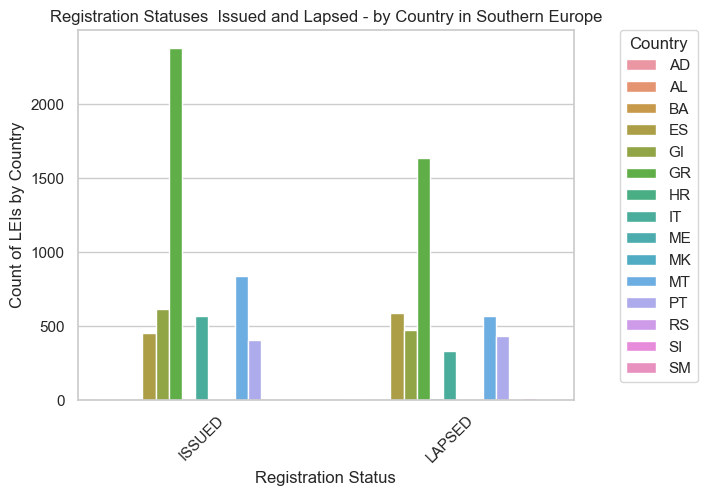

In [341]:
### Bar Chart to view the Registartion Status by Counrty in Southern Europe

# Use the .groupby Function to create the sub-totals
df_chartdata_chart = df_lei_country_region.groupby(['reg_status','sub_region','country'], as_index=False)['lei'].count()
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['sub_region'].isin(['Southern Europe'])]
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['reg_status'].isin(['ISSUED','LAPSED'])]
# Test
#print(df_chartdata_chart)

# Initialise the Chart
#Set the Theme of the Chart
sns.set_theme(style='whitegrid')
# use hue to seperate out by country.
chart = sns.barplot(x="reg_status", y="lei", 
            data=df_chartdata_chart, 
            hue="country"
           )

# Set the title and the axis labels
chart.set(title="Registration Statuses  Issued and Lapsed - by Country in Southern Europe")
chart.set(xlabel='Registration Status', ylabel='Count of LEIs by Country')


# rotate the axis to make them legible.
plt.xticks(rotation=45)

#Move the legend to the right as was overlapping the chart data.
plt.legend(title="Country", loc='upper right', bbox_to_anchor=(1.25, 1), borderaxespad=0)

# Show plot
plt.show()

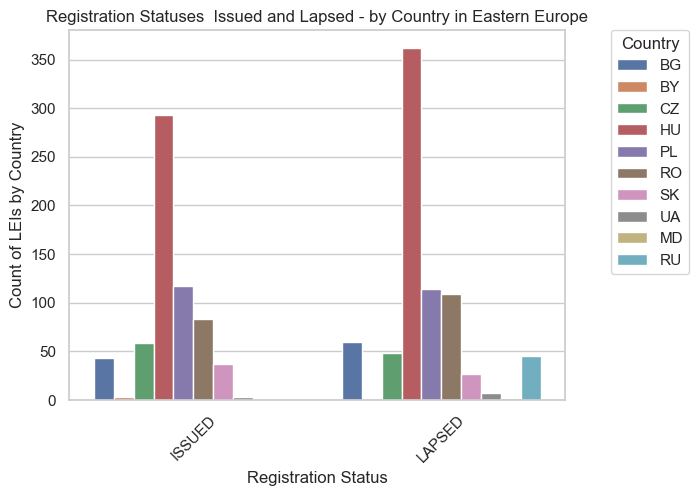

In [342]:
### Bar Chart to view the Registartion Status by Counrty in Eastern Europe

# Use the .groupby Function to create the sub-totals
df_chartdata_chart = df_lei_country_region.groupby(['reg_status','sub_region','country'], as_index=False)['lei'].count()
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['sub_region'].isin(['Eastern Europe'])]
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['reg_status'].isin(['ISSUED','LAPSED'])]
#print(df_chartdata_chart)

# Initialise the Chart
#Set the Theme of the Chart
sns.set_theme(style='whitegrid')
# use hue to seperate out by country.
chart = sns.barplot(x="reg_status", y="lei", 
            data=df_chartdata_chart, 
            hue="country"
           )

# Set the title and the axis labels
chart.set(title="Registration Statuses  Issued and Lapsed - by Country in Eastern Europe")
chart.set(xlabel='Registration Status', ylabel='Count of LEIs by Country')

# rotate the axis to make them legible.
plt.xticks(rotation=45)

#Move the legend to the right as was overlapping the chart data.
plt.legend(title="Country", loc='upper right', bbox_to_anchor=(1.25, 1), borderaxespad=0)

# Show plot
plt.show()

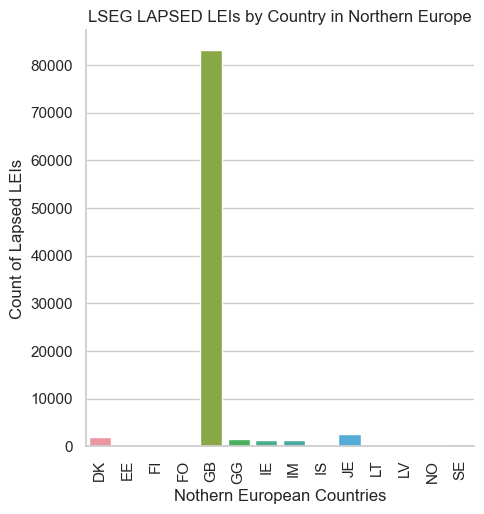

In [343]:
### Bar Chart to view LEIs by Counrty in Northern Europe with Status Lapsed

# Use the .groupby Function to create the sub-total
df_chartdata_chart = df_lei_country_region.groupby(['reg_status','region','sub_region', 'country'], as_index=False)['lei'].count()

# Use .isin to filter the required Data.
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['reg_status'].isin(['LAPSED'])]
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['sub_region'].isin(['Northern Europe'])]
#Test
#print(df_chartdata2)

# Initialise the plot
#Set the Theme of the Chart
sns.set_theme(style='whitegrid')
chart = sns.catplot(x="country", y="lei",  kind="bar", data=df_chartdata_chart)

# Set the Title and the axis labels for the plot
chart.set(title="LSEG LAPSED LEIs by Country in Northern Europe")
chart.set_axis_labels('Nothern European Countries', 'Count of Lapsed LEIs')

#Rotate the xtickes to make them legible.
plt.xticks(rotation=90)

# show the chart
plt.show()

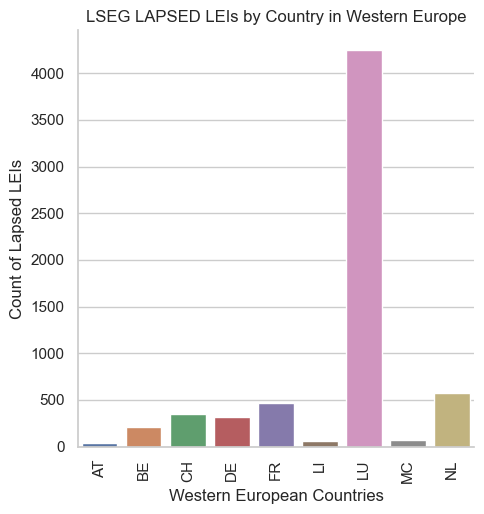

In [345]:
### Bar Chart to view LEIs by Counrty in Western Europe with Status Lapsed

# Use the .groupby Function to create the sub-total
df_chartdata_chart = df_lei_country_region.groupby(['reg_status','region','sub_region', 'country'], as_index=False)['lei'].count()
#print(df_chartdata_chart)

# Use the .isin() function to filter the required values
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['reg_status'].isin(['LAPSED'])]
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['sub_region'].isin(['Western Europe'])]
#print(df_chartdata2)

# Initialise the plot
#Set the Theme of the Chart
sns.set_theme(style='whitegrid')
chart = sns.catplot(x="country", y="lei",  kind="bar", data=df_chartdata_chart)

# Set the Title and the axis labels for the plot
chart.set(title="LSEG LAPSED LEIs by Country in Western Europe")
chart.set_axis_labels('Western European Countries', 'Count of Lapsed LEIs')

#Rotate the xtickes to make them legible.
plt.xticks(rotation=90)

# show the chart
plt.show()

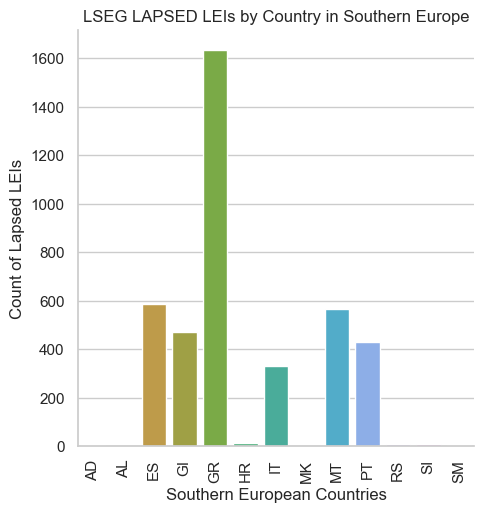

In [349]:
### Bar Chart to view LEIs by Counrty in Southern Europe with Status Lapsed

# Use the .groupby Function to create the sub-total
df_chartdata_chart = df_lei_country_region.groupby(['reg_status','region','sub_region', 'country'], as_index=False)['lei'].count()
#print(df_chartdata_chart)

# Use the .isin() function to filter the required values
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['reg_status'].isin(['LAPSED'])]
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['sub_region'].isin(['Southern Europe'])]
#print(df_chartdata2)

# Initialise the plot
#Set the Theme of the Chart
sns.set_theme(style='whitegrid')
chart = sns.catplot(x="country", y="lei",  kind="bar", data=df_chartdata_chart)

# Set the Title and the axis labels for the plot
chart.set(title="LSEG LAPSED LEIs by Country in Southern Europe")
chart.set_axis_labels('Southern European Countries', 'Count of Lapsed LEIs')

#Rotate the xtickes to make them legible.
plt.xticks(rotation=90)

# show the chart
plt.show()

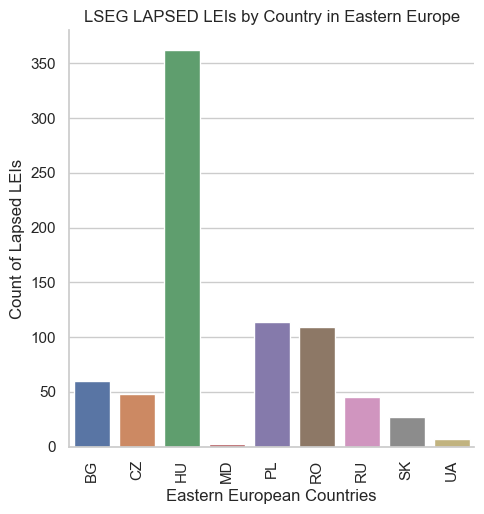

In [351]:
### Bar Chart to view LEIs by Counrty in Eastern Europe with Status Lapsed

# Use the .groupby Function to create the sub-total
df_chartdata_chart = df_lei_country_region.groupby(['reg_status','region','sub_region', 'country'], as_index=False)['lei'].count()
#print(df_chartdata_chart)

# Use the .isin() function to filter the required values
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['reg_status'].isin(['LAPSED'])]
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['sub_region'].isin(['Eastern Europe'])]
#print(df_chartdata2)

# Initialise the plot
#Set the Theme of the Chart
sns.set_theme(style='whitegrid')
chart = sns.catplot(x="country", y="lei",  kind="bar", data=df_chartdata_chart)

# Set the Title and the axis labels for the plot
chart.set(title="LSEG LAPSED LEIs by Country in Eastern Europe")
chart.set_axis_labels('Eastern European Countries', 'Count of Lapsed LEIs')

#Rotate the xtickes to make them legible.
plt.xticks(rotation=90)

# show the chart
plt.show()

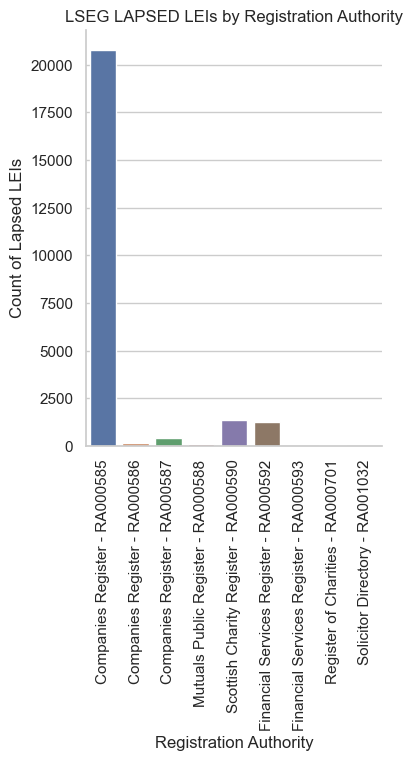

In [354]:
### Bar Chart to view LEIs by Registration Authority in the UK with Resigtarion Status 'Lapsed'

# Use the .groupby Function to create the sub-total

### DF COLUMN NAMES
###     ra_code                   215031 non-null  object 
### 9   ra_id                     140193 non-null  object 
### 10  legal_jurisdiction        0 non-null       float64
### 11  elf_code 

# Use the .groupby Function to create the sub-total
# NEW Data Frame to Include the Registration Authority Names
df_chartdata_chart = df_lei_country_region_reg_auth.groupby(['reg_status','region','sub_region', 'country','ra_code','Local_name_of_Register'], as_index=False)['lei'].count()
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['lei'] > 10 ]
#Test
#print(df_chartdata_chart)

# Set a custom names for the x axis to include the Regsitration Authority Name
df_chartdata_chart["Chart_Title"] = df_chartdata_chart['Local_name_of_Register'] + " - " + df_chartdata_chart['ra_code']

# Use the .isin function to filter the values required.
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['reg_status'].isin(['LAPSED'])]
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['country'].isin(['GB'])]
#Test
#print(df_chartdata_chart)

# Initialise the plot
# Set the Theme of the Chart
sns.set_theme(style='whitegrid')
chart = sns.catplot(x="Chart_Title", y="lei",  kind="bar", data=df_chartdata_chart)

# Set the Title and the axis labels for the plot
chart.set(title="LSEG LAPSED LEIs by Registration Authority")
chart.set_axis_labels('Registration Authority', 'Count of Lapsed LEIs')

#Rotate the xtickes to make them legible.
plt.xticks(rotation=90)

# show the chart
plt.show()

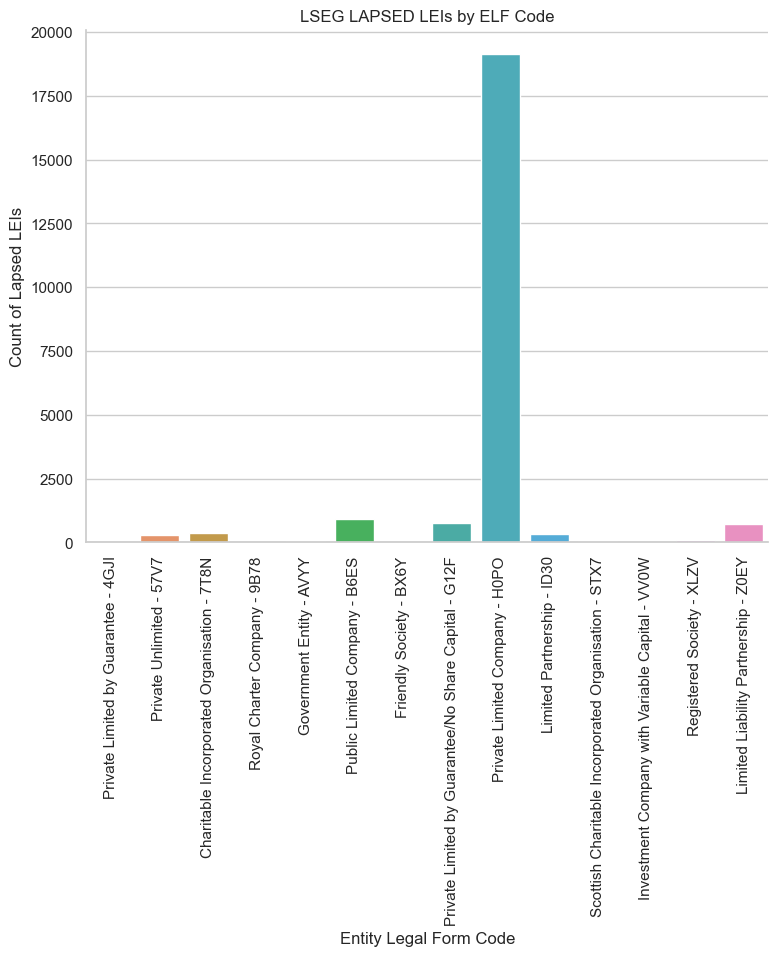

In [361]:
### Bar Chart to view LEIs by Entity Legal Form (ELF Code) in the UK with Resigtarion Status 'Lapsed'

### DF COLUMN NAMES
###     ra_code                   215031 non-null  object 
### 9   ra_id                     140193 non-null  object 
### 10  legal_jurisdiction        0 non-null       float64
### 11  elf_code 

# Use the .groupby Function to create the sub-total
df_chartdata_chart = df_lei_country_region_reg_auth_elf_code.groupby(['reg_status','region','sub_region', 'country','elf_code','Entity_Legal_Form_name_Local_name'], as_index=False)['lei'].count()
# Filter out the elf_codes with less than 10 LEIs to make chart more legible.
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['lei'] > 10 ]
#print(df_chartdata_chart)

# Set a custom names for the x axis to include the Regsitration Authority Name
df_chartdata_chart["x_title"] = df_chartdata_chart['Entity_Legal_Form_name_Local_name'] + " - " + df_chartdata_chart['elf_code']

# Use the .isin function to filter the values required.
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['reg_status'].isin(['LAPSED'])]
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['country'].isin(['GB'])]
#print(df_chartdata2)

# Initialise the plot
# Set the Theme of the Chart
sns.set_theme(style='whitegrid')
chart = sns.catplot(x="x_title", y="lei",  kind="bar", data=df_chartdata_chart, height=6, aspect=9/6) #height=6, aspect=9/6 to increase the size of the chart

# Set the Title and the axis labels for the plot
chart.set(title="LSEG LAPSED LEIs by ELF Code")
chart.set_axis_labels('Entity Legal Form Code', 'Count of Lapsed LEIs')
                      
#Rotate the xtickes to make them legible.
plt.xticks(rotation=90)

# show the chart
plt.show()

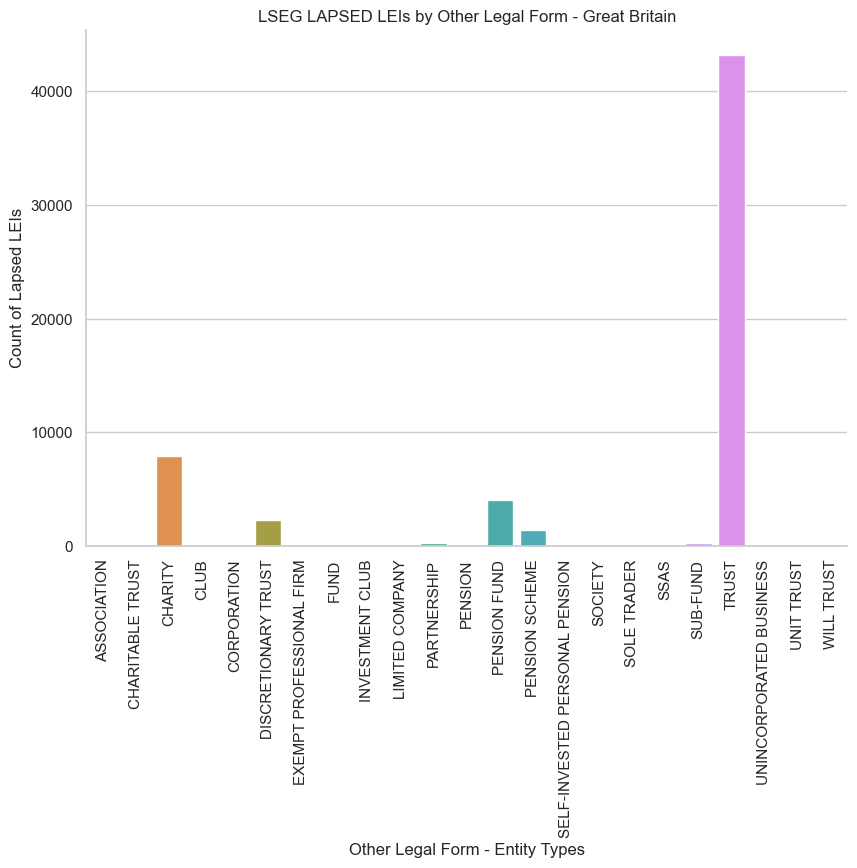

In [363]:
### Bar Chart to view LEIs by Other Legal Form in the UK with Resigtarion Status 'Lapsed'

### DF COLUMN NAMES
###     ra_code                   215031 non-null  object 
### 9   ra_id                     140193 non-null  object 
### 10  legal_jurisdiction        0 non-null       float64
### 11  elf_code 

# Use the .groupby Function to create the sub-total
df_chartdata_chart = df_lei_country_region.groupby(['reg_status','region','sub_region', 'country','elf_code', 'other_legal_form'], as_index=False)['lei'].count()
# Filter out the elf_codes with less than 10 LEIs to make chart more legible.
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['lei'] > 10 ]
#print(df_chartdata_chart)

# Use the .isin function to filter the values required.
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['reg_status'].isin(['LAPSED'])]
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['country'].isin(['GB'])]
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['elf_code'].isin(['8888'])]
#print(df_chartdata2)

# Initialise the plot
# Set the Theme of the Chart
sns.set_theme(style='whitegrid')
chart = sns.catplot(x="other_legal_form", y="lei",  kind="bar", data=df_chartdata_chart, height=6, aspect=9/6)  #height=6, aspect=9/6 to increase the size of the chart

# Set the Title and the axis labels for the plot
chart.set(title="LSEG LAPSED LEIs by Other Legal Form - Great Britain")
chart.set_axis_labels('Other Legal Form - Entity Types', 'Count of Lapsed LEIs')

#Rotate the xtickes to make them legible.
plt.xticks(rotation=90)

# show the chart
plt.show()

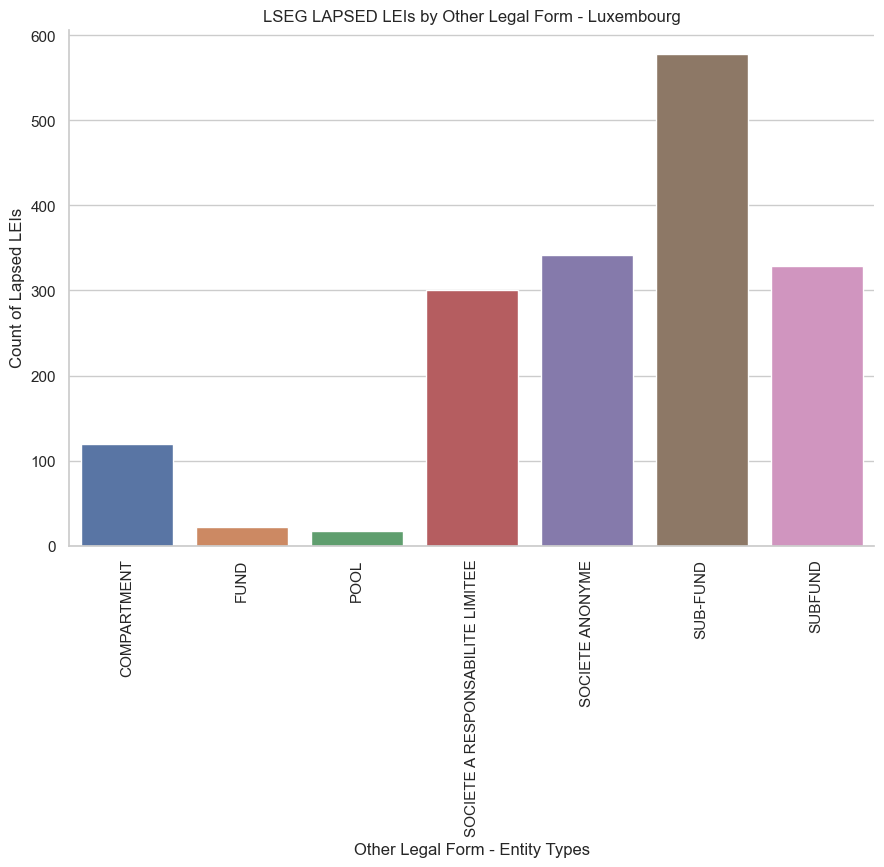

In [364]:
### Bar Chart to view LEIs by Other Legal Form in the Luxembourg with Resigtarion Status 'Lapsed'

### DF COLUMN NAMES
###     ra_code                   215031 non-null  object 
### 9   ra_id                     140193 non-null  object 
### 10  legal_jurisdiction        0 non-null       float64
### 11  elf_code 

# Use the .groupby Function to create the sub-total
df_chartdata_chart = df_lei_country_region.groupby(['reg_status','region','sub_region', 'country','elf_code', 'other_legal_form'], as_index=False)['lei'].count()
# Filter out the elf_codes with less than 10 LEIs to make chart more legible.
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['lei'] > 10 ]
#print(df_chartdata_chart)

# Use the .isin function to filter the values required.
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['reg_status'].isin(['LAPSED'])]
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['country'].isin(['LU'])]
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['elf_code'].isin(['8888'])]
#print(df_chartdata2)

# Initialise the plot
# Set the Theme of the Chart
sns.set_theme(style='whitegrid')
chart = sns.catplot(x="other_legal_form", y="lei",  kind="bar", data=df_chartdata_chart, height=6, aspect=9/6)  #height=6, aspect=9/6 to 

# Set the Title and the axis labels for the plot
chart.set(title="LSEG LAPSED LEIs by Other Legal Form - Luxembourg")
chart.set_axis_labels('Other Legal Form - Entity Types', 'Count of Lapsed LEIs')

#Rotate the xtickes to make them legible.
plt.xticks(rotation=90)

# show the chart
plt.show()

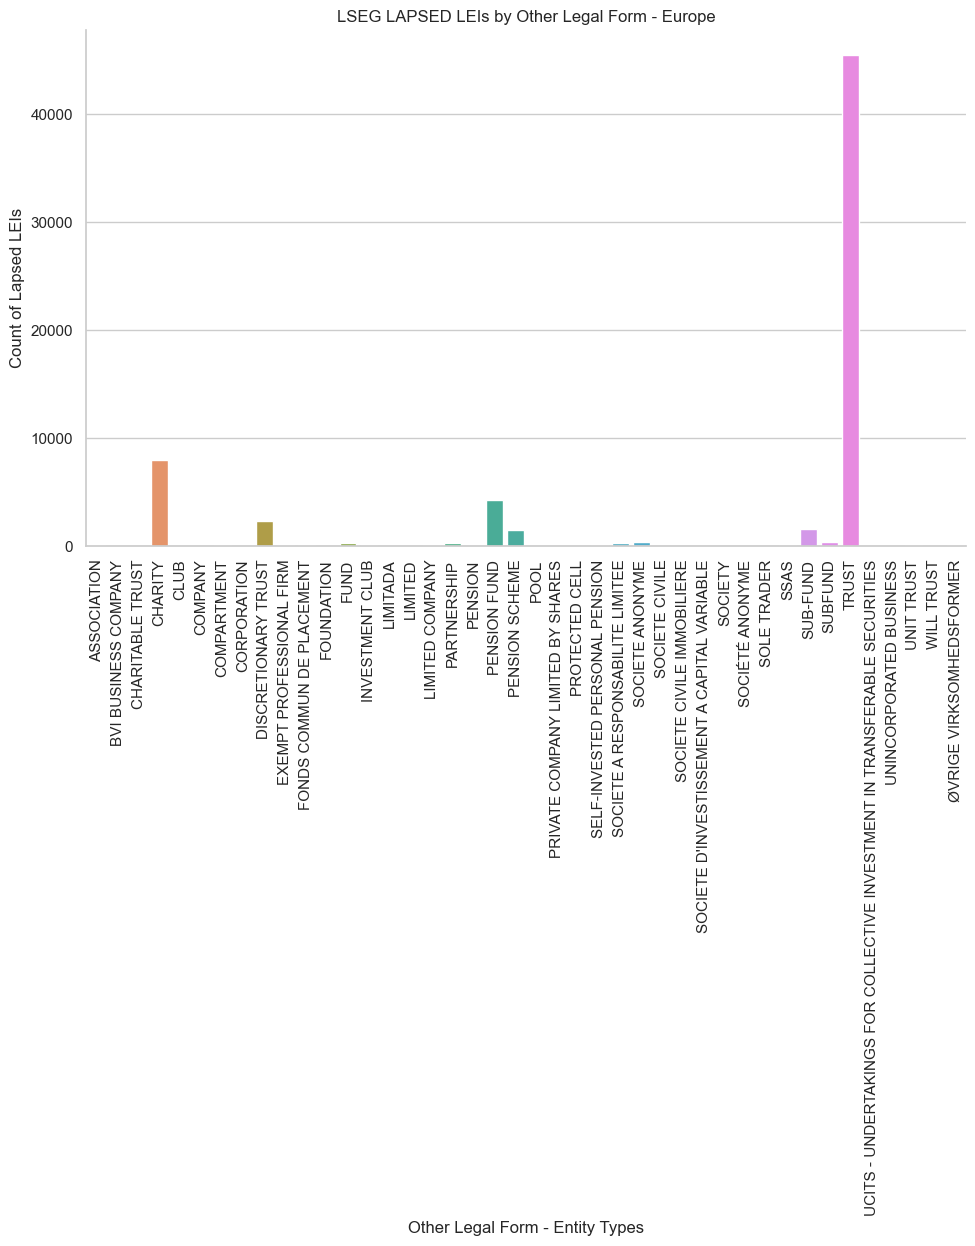

In [370]:
### Bar Chart to view LEIs by Other Legal Form in Europe with Resigtarion Status 'Lapsed'

### DF COLUMN NAMES
###     ra_code                   215031 non-null  object 
### 9   ra_id                     140193 non-null  object 
### 10  legal_jurisdiction        0 non-null       float64
### 11  elf_code 

# Use the .groupby Function to create the sub-total
df_chartdata_chart = df_lei_country_region.groupby(['reg_status','region','elf_code', 'other_legal_form'], as_index=False)['lei'].count()
# Filter out the elf_codes with less than 10 LEIs to make chart more legible.
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['lei'] > 10 ]
#print(df_chartdata_chart)

# Use the .isin function to filter the values required.
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['reg_status'].isin(['LAPSED'])]
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['region'].isin(['Europe'])]
#df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['elf_code'].isin(['8888'])]
#print(df_chartdata_chart)

# Initialise the plot
# Set the Theme of the Chart
sns.set_theme(style='whitegrid')
chart = sns.catplot(x="other_legal_form", y="lei",  kind="bar", data=df_chartdata_chart, height=6, aspect=12/6) 

# Set the Title and the axis labels for the plot
chart.set(title="LSEG LAPSED LEIs by Other Legal Form - Europe")
chart.set_axis_labels('Other Legal Form - Entity Types', 'Count of Lapsed LEIs')

#Rotate the xtickes to make them legible.
plt.xticks(rotation=90)

# show the chart
plt.show()

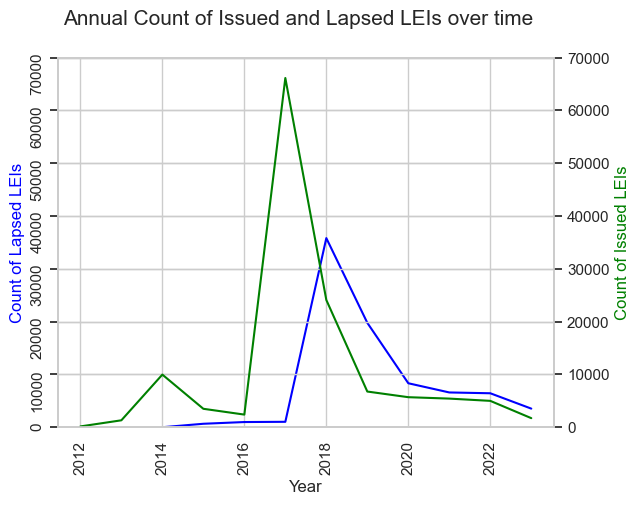

In [384]:
### Sub Plot to compare Registered LEIs with lapsed LEIs in the UK by Year

# Use the .groupby Function to create the sub-total
# Data for Axis 1
df_chartdata_chart = df_lei_country_region.groupby(['reg_status', 'country','ren_year'], as_index=False)['lei'].count()
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart[['reg_status','country']].isin(['LAPSED','GB']).all(axis=1)]  #.all both criteria are met
df_chartdata_chart = df_chartdata_chart.set_index("ren_year")
#print(df_chartdata_chart.head(10))

# Data for Axis 2
df_chartdata_chart2 = df_lei_country_region.groupby(['country','reg_year'], as_index=False)['lei'].count()
df_chartdata_chart2 = df_chartdata_chart2[df_chartdata_chart2[['country']].isin(['GB']).all(axis=1)]  #.all both criteria are met
df_chartdata_chart2 = df_chartdata_chart2.set_index("reg_year")
#print(df_chartdata_chart2.head(10))

#Initialise the subplot
fig, ax = plt.subplots()
# Set the title
fig.suptitle("Annual Count of Issued and Lapsed LEIs over time", fontsize=15)
# Share the Axis
ax2 = ax.twinx()

# Set the axis label and rotate for legibility
ax.set_xlabel("Year")
ax.tick_params(labelrotation=90)

# Set the axis label and give it a colour
ax.set_ylabel("Count of Lapsed LEIs" , color='blue')
# Set the y Limit so the same for both plots
ax.set_ylim(0, 70000) 
# Initialise the axis 1 plot and give it a colour
ax.plot(df_chartdata_chart.index, df_chartdata_chart['lei'], color='blue')

# Set the axis label and give it a colour
ax2.set_ylabel("Count of Issued LEIs" , color='green')
# Set the y Limit so the same for both plots
ax2.set_ylim(0, 70000)
# Initialise the axis 2 plot and give it a colour
ax2.plot(df_chartdata_chart2.index, df_chartdata_chart2['lei'], color='green')

# Show the plot
plt.show()

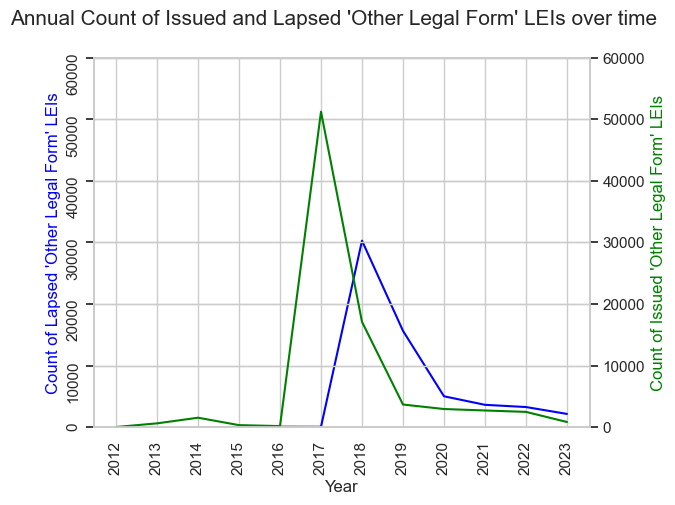

In [391]:
### Sub Plot to compare Registered LEIs with lapsed LEIs in the UK by Year with ELF Code 8888 Other Legal Form

# Use the .groupby Function to create the sub-total
# Data for Axis 1
df_chartdata_chart = df_lei_country_region.groupby(['reg_status', 'country','ren_year','elf_code'], as_index=False)['lei'].count()
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart[['reg_status','country','elf_code']].isin(['LAPSED','GB','8888']).all(axis=1)]  #.all both criteria are met
df_chartdata_chart = df_chartdata_chart.set_index("ren_year")
#print(df_chartdata_chart.head(10))

df_chartdata_chart2 = df_lei_country_region.groupby(['country','reg_year','elf_code'], as_index=False)['lei'].count()
df_chartdata_chart2 = df_chartdata_chart2[df_chartdata_chart2[['country','elf_code']].isin(['GB','8888']).all(axis=1)]  #.all both criteria are met
df_chartdata_chart2 = df_chartdata_chart2.set_index("reg_year")
#print(df_chartdata_chart2.head(10))


#Initialise the subplot
fig, ax = plt.subplots()
# Set the title
fig.suptitle("Annual Count of Issued and Lapsed 'Other Legal Form' LEIs over time", fontsize=15)
# Share the Axis
ax2 = ax.twinx()

# Set the axis label and rotate for legibility
ax.set_xlabel("Year")
ax.tick_params(labelrotation=90)

# Set the axis label and give it a colour
ax.set_ylabel("Count of Lapsed 'Other Legal Form' LEIs" , color='blue')
# Set the y Limit so the same for both plots
ax.set_ylim(0, 60000)
# Initialise the axis 1 plot and give it a colour
ax.plot(df_chartdata_chart.index, df_chartdata_chart['lei'], color='blue')

# Set the axis label and give it a colour
ax2.set_ylabel("Count of Issued 'Other Legal Form' LEIs" , color='green')
# Set the y Limit so the same for both plots
ax2.set_ylim(0, 60000)
# Initialise the axis 2 plot and give it a colour
ax2.plot(df_chartdata_chart2.index, df_chartdata_chart2['lei'], color='green')

# Set the Tick Labels so that all Years are shown on the x-axis.
#https://stackoverflow.com/questions/73667044/ticks-and-labels-on-twin-axes
ticks = [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
labels = ["2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022","2023"]
ax.xaxis.set_ticks(ticks, labels=labels) 

# Show the plot.
plt.show()

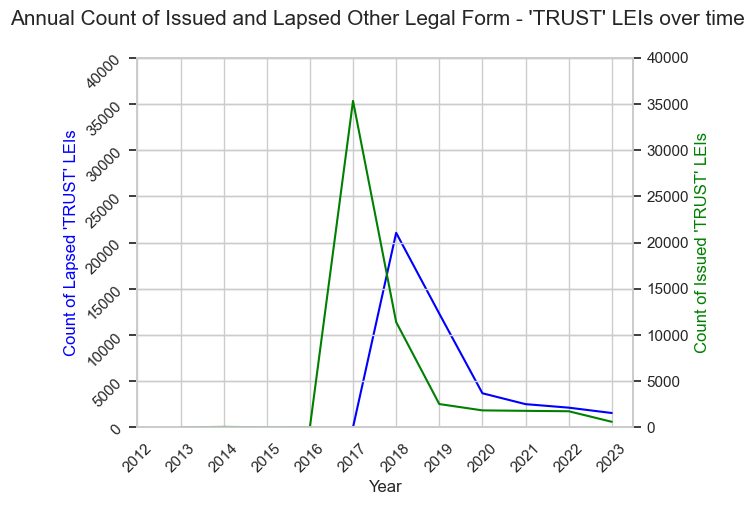

In [389]:
### Sub Plot to compare Registered LEIs with lapsed LEIs in the UK by Year with ELF Code 8888 for the Other Legal Form TRUST

# Use the .groupby Function to create the sub-total
# Data for Axis 1
df_chartdata_chart = df_lei_country_region.groupby(['reg_status', 'country','ren_year','other_legal_form'], as_index=False)['lei'].count()
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart[['reg_status','country','other_legal_form']].isin(['LAPSED','GB','TRUST']).all(axis=1)]  #.all both criteria are met
df_chartdata_chart = df_chartdata_chart.set_index("ren_year")
#print(df_chartdata_chart.head(10))

# Data for Axis 2
df_chartdata_chart2 = df_lei_country_region.groupby(['country','reg_year','other_legal_form'], as_index=False)['lei'].count()
df_chartdata_chart2 = df_chartdata_chart2[df_chartdata_chart2[['country','other_legal_form']].isin(['GB','TRUST']).all(axis=1)]  #.all both criteria are met
df_chartdata_chart2 = df_chartdata_chart2.set_index("reg_year")
#print(df_chartdata_chart2.head(10))

#Initialise the subplot
fig, ax = plt.subplots()
# Set the title
fig.suptitle("Annual Count of Issued and Lapsed Other Legal Form - 'TRUST' LEIs over time", fontsize=15)
# Share the Axis
ax2 = ax.twinx()

# Set the axis label and rotate for legibility
ax.set_xlabel("Year")
ax.tick_params(labelrotation=45)

# Set the axis label and give it a colour
ax.set_ylabel("Count of Lapsed 'TRUST' LEIs" , color='blue')
# Set the y Limit so the same for both plots
ax.set_ylim(0, 40000)
# Initialise the axis 1 plot and give it a colour
ax.plot(df_chartdata_chart.index, df_chartdata_chart['lei'], color='blue')

# Set the axis label and give it a colour
ax2.set_ylabel("Count of Issued 'TRUST' LEIs" , color='green')
# Set the y Limit so the same for both plots
ax2.set_ylim(0, 40000)
# Initialise the axis 2 plot and give it a colour
ax2.plot(df_chartdata_chart2.index, df_chartdata_chart2['lei'], color='green')


# Set the Tick Labels so that all Years are shown on the x-axis.
#https://stackoverflow.com/questions/73667044/ticks-and-labels-on-twin-axes
ticks = [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
labels = ["2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022","2023"]
ax.xaxis.set_ticks(ticks, labels=labels) 

# Show the plot.
plt.show()

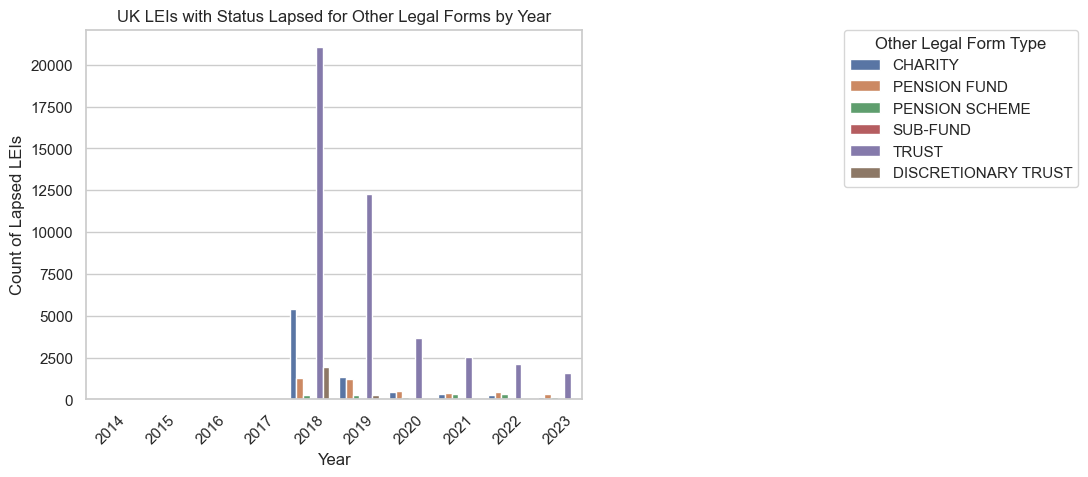

In [411]:
### Bar Chart to view LEIs by Other Legal Form in GB with Resigtarion Status 'Lapsed' by Year

# Use the .groupby Function to create the sub-total
df_chartdata_chart = df_lei_country_region.groupby(['reg_status', 'country','ren_year','other_legal_form'], as_index=False)['lei'].count()
# use .isin() to filter the values desired.
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart[['reg_status','country']].isin(['LAPSED','GB']).all(axis=1)] 
# use .isin() to select the other_legal_forms required - 'TRUST','SUB-FUND','SUBFUND', 'PENSION FUND', 'CHARITY','PENSION SCHEME','DISCRETIONARY TRUST'
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['other_legal_form'].isin(['TRUST','SUB-FUND','SUBFUND', 'PENSION FUND', 'CHARITY','PENSION SCHEME','DISCRETIONARY TRUST'])]
# Set Renewal Year as the Index
df_chartdata_chart = df_chartdata_chart.set_index("ren_year")

#Test Chart Data
#print(df_chartdata_chart)

# Initialise the plot
# Set the Theme of the Chart
sns.set_theme(style="whitegrid")
chart = sns.barplot(x=df_chartdata_chart.index, y="lei", 
            data=df_chartdata_chart, 
            hue="other_legal_form"
           )
# Set the Chart Title and axis labels
chart.set(title="UK LEIs with Status Lapsed for Other Legal Forms by Year")
chart.set(xlabel='Year', ylabel='Count of Lapsed LEIs')

# Postion the Legend to the Right and give it a title.
plt.legend(title="Other Legal Form Type", loc='upper right', bbox_to_anchor=(2, 1), borderaxespad=0)

#Rotate the xticks to make them Legible.
plt.xticks(rotation=45)

# Show plot
plt.show()

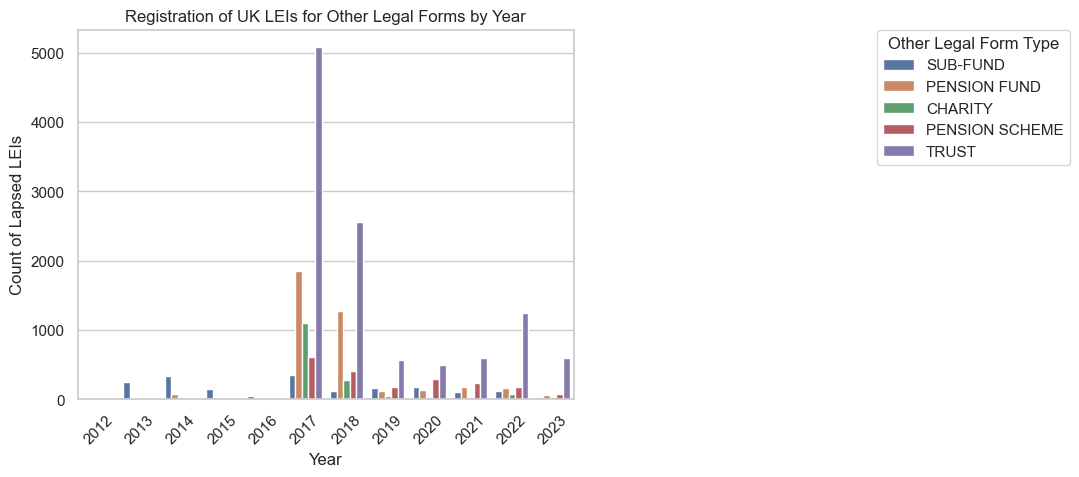

In [413]:
### Bar Chart to view LEIs by Other Legal Form in GB with Resigtarion Status 'Lapsed' by Year

# Use the .groupby Function to create the sub-total
df_chartdata_chart = df_lei_country_region.groupby(['reg_status', 'country','reg_year','other_legal_form'], as_index=False)['lei'].count()
# use .isin() to filter the values desired.
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart[['reg_status','country']].isin(['ISSUED','GB']).all(axis=1)] 
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['other_legal_form'].isin(['TRUST','SUB-FUND','SUBFUND', 'PENSION FUND', 'CHARITY','PENSION SCHEME','DISCRETIONARY TRUST'])]#.all both criteria are met

#Set the index to registration Year
df_chartdata_chart = df_chartdata_chart.set_index("reg_year")
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['lei'] > 10 ]

#Test Print
#print(df_chartdata_chart)

# Initialise the plot
# Set the Theme of the Chart
sns.set_theme(style="whitegrid")
chart = sns.barplot(x=df_chartdata_chart.index, y="lei", 
            data=df_chartdata_chart, 
            hue="other_legal_form"
           )
# Set the Chart Title and axis labels
chart.set(title="Registration of UK LEIs for Other Legal Forms by Year")
chart.set(xlabel='Year', ylabel='Count of Lapsed LEIs')

# Postion the Legend to the Right and give it a title.
plt.legend(title="Other Legal Form Type", loc='upper right', bbox_to_anchor=(2, 1), borderaxespad=0)

#Rotate the xticks to make them Legible.
plt.xticks(rotation=45)

# Show plot
plt.show()

         reg_status country     other_legal_form   lei
ren_year                                              
2015         LAPSED      GB         PENSION FUND     7
2015         LAPSED      GB             SUB-FUND    11
2016         LAPSED      GB              CHARITY     9
2016         LAPSED      GB         PENSION FUND     8
2016         LAPSED      GB             SUB-FUND    43
2017         LAPSED      GB              CHARITY     9
2017         LAPSED      GB         PENSION FUND    11
2017         LAPSED      GB             SUB-FUND    29
2018         LAPSED      GB              CHARITY  5417
2018         LAPSED      GB  DISCRETIONARY TRUST  1961
2018         LAPSED      GB         PENSION FUND  1290
2018         LAPSED      GB       PENSION SCHEME   239
2018         LAPSED      GB             SUB-FUND    18
2019         LAPSED      GB              CHARITY  1319
2019         LAPSED      GB  DISCRETIONARY TRUST   275
2019         LAPSED      GB         PENSION FUND  1189
2019      

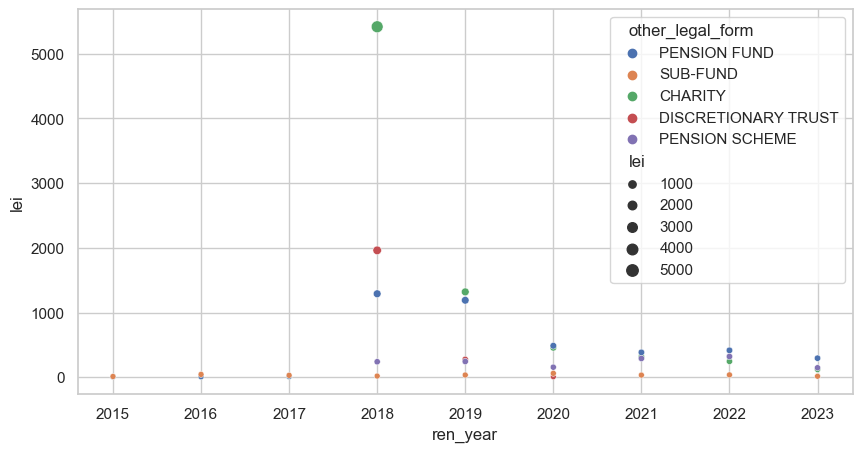

In [306]:
df_chartdata_chart = df_lei_country_region.groupby(['reg_status', 'country','ren_year','other_legal_form'], as_index=False)['lei'].count()
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart[['reg_status','country']].isin(['LAPSED','GB']).all(axis=1)] 
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['other_legal_form'].isin(['SUB-FUND','SUBFUND', 'PENSION FUND', 'CHARITY','PENSION SCHEME','DISCRETIONARY TRUST'])]#.all both criteria are met
df_chartdata_chart = df_chartdata_chart.set_index("ren_year")
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['lei'] > 5 ]
print(df_chartdata_chart)
plt.subplots(figsize=(10,5))

sns.scatterplot(x='ren_year',y='lei', data=df_chartdata_chart, hue='other_legal_form', size='lei')
#plt.plot(df_chartdata_chart['ren_year'],df_chartdata_chart['other_legal_form'])
plt.show()

     reg_status country  reg_year  other_legal_form
0      ANNULLED      CH      2014                 1
1      ANNULLED      DE      2014                 1
2      ANNULLED      FR      2014                 1
3      ANNULLED      FR      2021                 1
4      ANNULLED      GB      2014                 1
...         ...     ...       ...               ...
4571    RETIRED      ZA      2015                 1
4572    RETIRED      ZA      2015                 1
4573    RETIRED      ZA      2016                 1
4574    RETIRED      ZA      2017                 5
4575    RETIRED      ZA      2017                 1

[4576 rows x 4 columns]
         reg_status country other_legal_form  lei
reg_year                                         
2017      DUPLICATE      GB          CHARITY   25
2017      DUPLICATE      GB     PENSION FUND   12
2018      DUPLICATE      GB          CHARITY   13
2018      DUPLICATE      GB     PENSION FUND   20
2012         ISSUED      GB     PENSION FUND    6
.

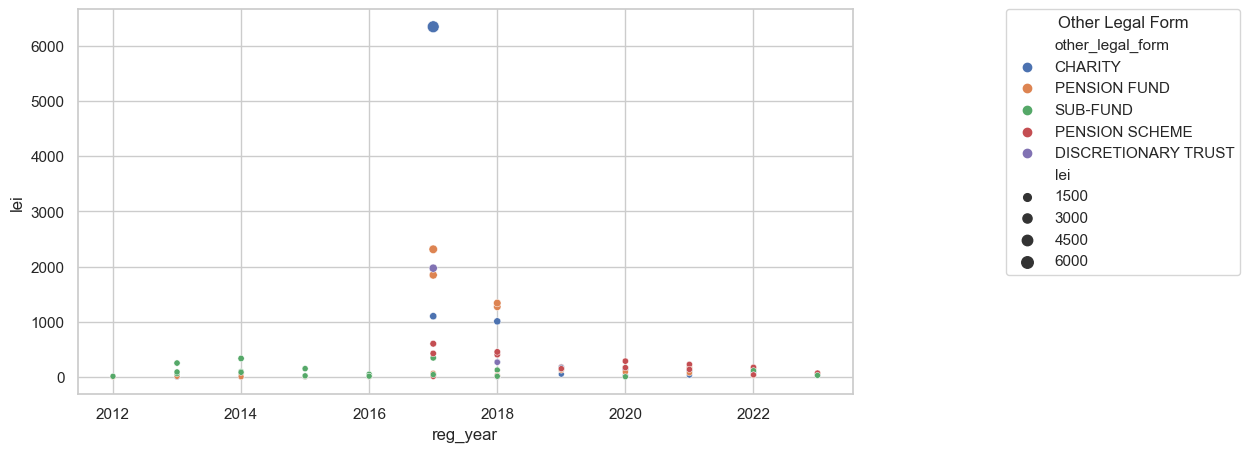

In [313]:
df_chartdata_chart = df_lei_country_region.groupby(['reg_status', 'country','reg_year','other_legal_form'], as_index=False)['lei'].count()
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart[['country']].isin(['GB']).all(axis=1)] 
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['other_legal_form'].isin(['SUB-FUND','SUBFUND', 'PENSION FUND', 'CHARITY','PENSION SCHEME','DISCRETIONARY TRUST'])]#.all both criteria are met
df_chartdata_chart = df_chartdata_chart.set_index("reg_year")
df_chartdata_chart = df_chartdata_chart[df_chartdata_chart['lei'] > 5 ]
print(df_chartdata_chart)
plt.subplots(figsize=(10,5))

sns.scatterplot(x='reg_year',y='lei', data=df_chartdata_chart, hue='other_legal_form', size='lei')
plt.legend(title="Other Legal Form", loc='upper right', bbox_to_anchor=(1.5, 1), borderaxespad=0)
#plt.plot(df_chartdata_chart['ren_year'],df_chartdata_chart['other_legal_form'])
plt.show()

          reg_status country                other_legal_form   lei
reg_month                                                         
1             ISSUED      GB                         CHARITY   165
1             ISSUED      GB                    PENSION FUND   937
1             ISSUED      GB                  PENSION SCHEME   219
1             ISSUED      GB                        SUB-FUND   352
1             ISSUED      GB                           TRUST  1664
...              ...     ...                             ...   ...
10            ISSUED      VG  INTERNATIONAL BUSINESS COMPANY    55
11            ISSUED      VG            BVI BUSINESS COMPANY   101
11            ISSUED      VG  INTERNATIONAL BUSINESS COMPANY    94
12            ISSUED      VG            BVI BUSINESS COMPANY   146
12            ISSUED      VG  INTERNATIONAL BUSINESS COMPANY   100

[113 rows x 4 columns]


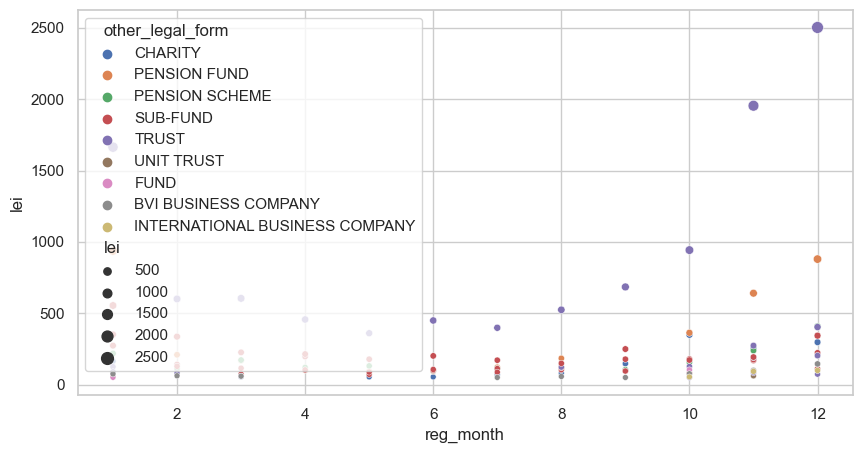